In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [112]:
Airline = pd.read_excel('Airlines+Data.xlsx')
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [113]:
Airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [114]:
Airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [115]:
Airline.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [116]:
Airline.sample(4)

,Month,Passengers
38,1998-03-01,193
65,2000-06-01,264
92,2002-09-01,355
61,2000-02-01,188


In [117]:
Airline.info

<bound method DataFrame.info of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [118]:
Airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [119]:
Airline.shape

(96, 2)

In [120]:
Airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

# DATA VISUALIZATION.

In [121]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

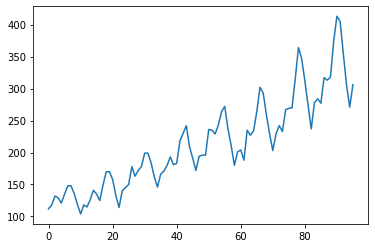

In [122]:
Airline.Passengers.plot()

<AxesSubplot:xlabel='Passengers'>

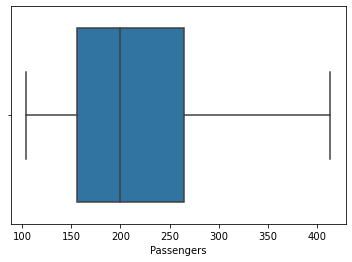

In [123]:
sns.boxplot(Airline.Passengers)

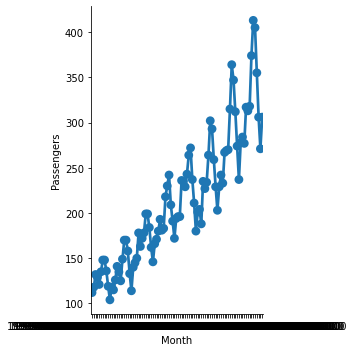

In [124]:
sns.factorplot('Month','Passengers',data=Airline)

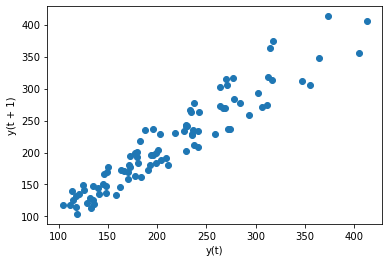

In [125]:
from pandas.plotting import lag_plot
lag_plot(Airline['Passengers'])
plt.show()

# Moving Average Method.

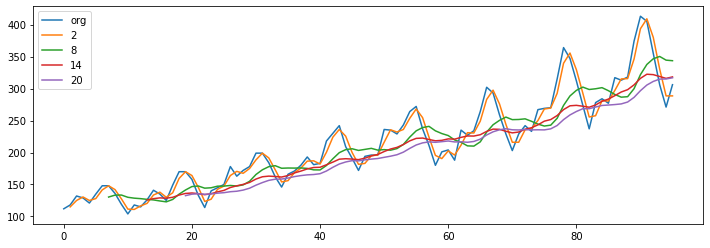

In [126]:
plt.figure(figsize=(12,4))
Airline.Passengers.plot(label="org")
for i in range(2,24,6):
    Airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot.

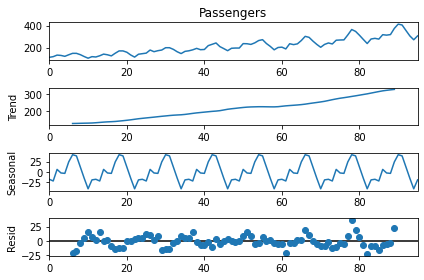

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Airline.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

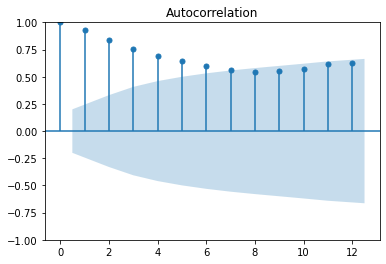

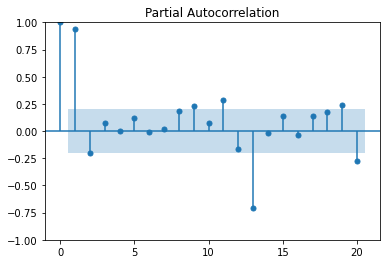

In [128]:
import warnings
warnings.filterwarnings("ignore")
tsa_plots.plot_acf(Airline.Passengers,lags=12)
tsa_plots.plot_pacf(Airline.Passengers)
plt.show()

# Evaluation Metric MAPE.

In [129]:
Train = Airline.head(70)
Test = Airline.tail(26)

In [130]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method.

In [131]:
import warnings
warnings.filterwarnings("ignore")
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

87.68716210922975

# Holt method.

In [132]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

66.01246807642437

# Holts winter exponential smoothing with additive seasonality and additive trend.

In [133]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

61.55144017258007

# Holts winter exponential smoothing with multiplicative seasonality and additive trend.

In [134]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

59.56732090784542

In [135]:
#From above 4 methods,we can see least MAPE for Holts winter exponential smoothing with additive seasonality and additive trend.

In [136]:
# 10 future forecast.

In [137]:
hwe_model_add_add.forecast(10)

70    239.774604
71    243.819352
72    235.893590
73    235.903799
74    246.673925
75    250.718672
76    242.792911
77    242.803120
78    253.573245
79    257.617993
dtype: float64

In [138]:
hwe_model_add_add.params

{'smoothing_level': 0.9998507844789793,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 118.33642591651872,
 'initial_trend': 1.724830167281932,
 'initial_seasons': array([-8.05470448, -9.76932576, -0.72403066,  1.59588713]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

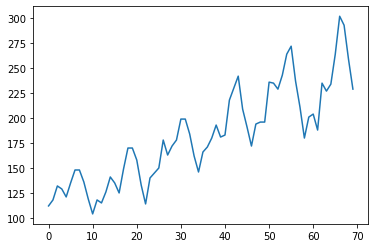

In [139]:
plt.plot(Train.index, Train["Passengers"], label='Train')

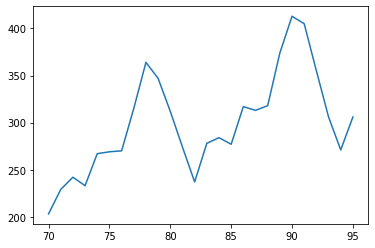

In [140]:
plt.plot(Test.index, Test["Passengers"], label='Test')

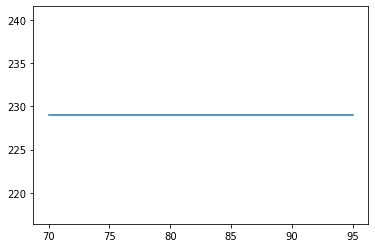

In [141]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential')

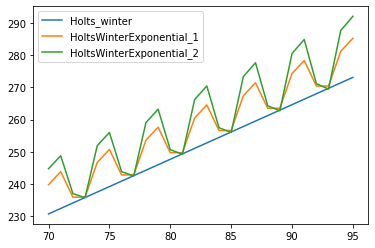

In [142]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2")
plt.legend(loc='best')

# Model Based Methods.

In [143]:
#Using c standred formate convert date time to string and extract year and month.

In [144]:
Airline["Date"] = pd.to_datetime(Airline["Month"],format="%b-%y")
Airline

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [145]:
Airline["month"] = Airline.Date.dt.strftime("%b") 
Airline["year"]  = Airline.Date.dt.strftime("%Y") 

In [146]:
Airline

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [147]:
t= np.arange(1,97)
Airline['t']=t
Airline['t_square']=Airline['t']*Airline['t']
log_Passengers=np.log(Airline['Passengers'])
Airline['log_Passengers']=log_Passengers

In [148]:
Airline = pd.get_dummies(Airline,columns=['month'])

In [149]:
Airline

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building [training and testing]

In [150]:
Train = Airline.head(70)
Test  = Airline.tail(26)

# Linear model.

In [151]:
linear= smf.ols('Passengers~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Passengers'])-np.array(predlin))**2))
rmselin

17.681879908211886

# Quadratic model.

In [152]:
quad=smf.ols('Passengers~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742656

# Expotential model.

In [153]:
expo=smf.ols('log_Passengers~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446902

# Additive seasonality.

In [154]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predadd = pd.Series(additive.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828821

# Additive seasonality with linear trend.

In [155]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predaddlinear = pd.Series(addlinear.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.5020897942713

# Additive seasonality with quadratic trend.

In [156]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predaddquad = pd.Series(addquad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895923845

# Multiplicative seasonality.

In [157]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predmul = pd.Series(mulsea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

# Multiplicative seasonality with linear trend.

In [158]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predmullin = pd.Series(mullin.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predmullin))**2))
rmsemul

298.6798189957354

# Multiplicative seasonality with quadratic trend.

In [159]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895923845

# Compare RMSE Value.

In [160]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
      'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)

In [161]:
table_rmse

,Model,Values
0,rmse_mul_quad,30.393043
1,rmseadd,124.975700
2,rmseaddlinear,34.502090
3,rmseaddquad,30.393043
4,rmseexpo,43.478471
5,rmselin,17.681880
6,rmsemul,298.679819
7,rmsemulin,298.136614
8,rmsequad,43.898145


In [162]:
# From the above table,we can see RMSE for Linear model is giving less value,thus it is best model.